### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.utils import resample
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ruta donde están los archivos
ruta = r"E:\UniAndes\Proyecto de Grado\Datos"


# Archivos
archivos_clientes = [
    "TC1_07_2025_CELSIA_VALLE_V2.csv",
    "TC1_08_2025_CELSIA_VALLE_V2.csv"
]

archivos_indicadores = [
    "Compensacion_2025_07.csv",
    "Compensacion_2025_08.csv"
]

# --- Cargar bases de CLIENTES ---
# --- Cargar bases de CLIENTES ---
clientes = pd.concat(
    [
        pd.read_csv(
            os.path.join(ruta, archivo),
            sep=',',
            encoding='utf-8',
            dtype={"NIU": str},          
            low_memory=False
        )
        # Extraer el PERIODO desde el nombre del archivo (ej: 07_2025)
        .assign(
            archivo_origen=archivo,
            tipo_base="clientes",
            PERIODO=pd.to_datetime(
                re.search(r'(\d{2}_\d{4})', archivo).group(1),
                format='%m_%Y'
            )
        )
        for archivo in archivos_clientes
    ],
    ignore_index=True
)       

# Ajustar formato del PERIODO a texto YYYY-MM
clientes['PERIODO'] = clientes['PERIODO'].dt.strftime('%Y-%m')

# --- Cargar bases de INDICADORES ---
indicadores = pd.concat(
    [
        pd.read_csv(
            os.path.join(ruta, archivo),
            sep=';',
            encoding='utf-8',
            dtype={"NIU": str},
            low_memory=False
        ).assign(archivo_origen=archivo)
        for archivo in archivos_indicadores
    ],
    ignore_index=True
)
indicadores["tipo_base"] = "indicadores"

# Alinear formato de periodo
indicadores['PERIODO'] = pd.to_datetime(indicadores['PERIODO'], errors='coerce').dt.strftime('%Y-%m')

print(clientes[['NIU','PERIODO']].head())
print(indicadores[['NIU','PERIODO']].head())

# --- Limpieza de nombres de columnas ---
clientes.columns = clientes.columns.str.strip().str.upper().str.replace(" ", "_")
indicadores.columns = indicadores.columns.str.strip().str.upper().str.replace(" ", "_")

# --- Unión por NIU ---
#df_integrado = pd.merge(indicadores, clientes, on="NIU", how="inner")

# --- Resumen final ---
#print("Registros integrados:", df_integrado.shape[0])
#print("Columnas totales:", df_integrado.shape[1])
#print("Ejemplo de NIU:", df_integrado["NIU"].head(5))

# --- Guardar el dataset unificado ---
#df_integrado.to_csv(os.path.join(ruta, "Dataset_Integrado_Compensaciones.csv"), index=False, encoding='utf-8')

           NIU  PERIODO
0      2896755  2025-07
1      3518981  2025-07
2  20230321850  2025-07
3      2949132  2025-07
4      3213681  2025-07
       NIU  PERIODO
0  1000001  2025-07
1  1000005  2025-07
2  1000008  2025-07
3  1000009  2025-07
4  1000011  2025-07


In [3]:
indicadores

,ERROR_EN_METAS,OPERADOR_RED,PERIODO,NIU,DIU,DIUM,FIU,FIUM,HC,DIUG,...,GRUPO_CALIDAD,NIVEL_TENSION,CARGO_DISTRIBUCION,CONSUMO_MES,MES_FACTURADOS,DURA._INTERRUPCIONES,%_PROP._ACTIVO,ID_MERCADO,ARCHIVO_ORIGEN,TIPO_BASE
0,NO,CELSIA VALLE,2025-07,1000001,0.00000,0.00000,0,0,0.0,10.25,...,12,1,398.997,167.0,1,0.00055,100,561,Compensacion_2025_07.csv,indicadores
1,NO,CELSIA VALLE,2025-07,1000005,13.29471,0.00000,4,0,0.0,57.02,...,32,1,398.997,0.0,2,12.93388,100,561,Compensacion_2025_07.csv,indicadores
2,NO,CELSIA VALLE,2025-07,1000008,13.29471,0.00000,4,0,0.0,57.02,...,32,1,398.997,0.0,2,12.93388,100,561,Compensacion_2025_07.csv,indicadores
3,NO,CELSIA VALLE,2025-07,1000009,13.29471,0.00000,4,0,0.0,57.02,...,32,1,398.997,0.0,2,12.93388,100,561,Compensacion_2025_07.csv,indicadores
4,NO,CELSIA VALLE,2025-07,1000011,13.29471,0.00000,4,0,0.0,57.02,...,32,1,398.997,0.0,2,12.93388,100,561,Compensacion_2025_07.csv,indicadores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443697,NO,CELSIA VALLE,2025-08,9887654,5.47000,0.00000,4,0,0.0,40.96,...,31,1,398.370,182.0,2,1.33277,100,561,Compensacion_2025_08.csv,indicadores
1443698,NO,CELSIA VALLE,2025-08,990920112578,13.50000,2.20583,27,3,0.0,57.02,...,32,1,398.370,0.0,2,0.00916,100,561,Compensacion_2025_08.csv,indicadores
1443699,NO,CELSIA VALLE,2025-08,993320550,3.50000,0.00000,3,0,0.0,40.96,...,31,1,326.865,0.0,2,0.00972,0,561,Compensacion_2025_08.csv,indicadores
1443700,NO,CELSIA VALLE,2025-08,9945573156,2.91000,0.00000,3,0,0.0,40.96,...,31,1,398.370,0.0,2,3.87860,100,561,Compensacion_2025_08.csv,indicadores


In [4]:
clientes

,NIU,CODIGO_CONEXION,TIPO_CONEXION,NIVEL_TENSION,NIVEL_TENSIÓN_PRIMARIA,PORC_PROP_ACTIV,CONEXION_RED,ID_COMERCIALIZADOR,ID_MERCADO,GRUPO_CALIDAD,...,EXP_ENERGIA,CAPAC_AUTOGEN,TIP_GENERACION,COD_FRONTERA_EXPORT,F_ENTRADA_GENERAR,CONTR_RESPALDO,CAPAC_CONTR_RES,ARCHIVO_ORIGEN,TIPO_BASE,PERIODO
0,2896755,65030128,2,1,2,100,1,536,561,32,...,1.0,12.0,1.0,AGPE0001,07-09-2022,2.0,NaN,TC1_07_2025_CELSIA_VALLE_V2.csv,clientes,2025-07
1,3518981,65005423,2,1,2,100,1,536,561,32,...,1.0,6.0,5.0,AGPE0001,31-12-2020,2.0,NaN,TC1_07_2025_CELSIA_VALLE_V2.csv,clientes,2025-07
2,20230321850,129000000919116,2,1,2,100,1,536,561,32,...,1.0,12.0,1.0,AGPE0001,01-08-2024,2.0,NaN,TC1_07_2025_CELSIA_VALLE_V2.csv,clientes,2025-07
3,2949132,65005489,2,1,2,100,1,536,561,32,...,1.0,1.0,1.0,AGPE0001,31-10-2023,2.0,NaN,TC1_07_2025_CELSIA_VALLE_V2.csv,clientes,2025-07
4,3213681,65724288,2,1,3,100,1,536,561,32,...,1.0,100.0,1.0,AGPE0001,25-06-2024,2.0,NaN,TC1_07_2025_CELSIA_VALLE_V2.csv,clientes,2025-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469982,4085956,65722646,2,1,2,100,1,62371,561,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC1_08_2025_CELSIA_VALLE_V2.csv,clientes,2025-08
1469983,20230002879,65006411,2,1,2,100,1,62371,561,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC1_08_2025_CELSIA_VALLE_V2.csv,clientes,2025-08
1469984,28003630115,65030701,2,3,0,101,1,62371,561,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC1_08_2025_CELSIA_VALLE_V2.csv,clientes,2025-08
1469985,28003630171,65030701,2,3,0,101,1,62371,561,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC1_08_2025_CELSIA_VALLE_V2.csv,clientes,2025-08


### Preprocesamiento de datos
##### Base 1 Clientes

In [8]:
print(indicadores)

        ERROR_EN_METAS  OPERADOR_RED  PERIODO           NIU       DIU  \
0                   NO  CELSIA VALLE  2025-07       1000001   0.00000   
1                   NO  CELSIA VALLE  2025-07       1000005  13.29471   
2                   NO  CELSIA VALLE  2025-07       1000008  13.29471   
3                   NO  CELSIA VALLE  2025-07       1000009  13.29471   
4                   NO  CELSIA VALLE  2025-07       1000011  13.29471   
...                ...           ...      ...           ...       ...   
1443697             NO  CELSIA VALLE  2025-08       9887654   5.47000   
1443698             NO  CELSIA VALLE  2025-08  990920112578  13.50000   
1443699             NO  CELSIA VALLE  2025-08     993320550   3.50000   
1443700             NO  CELSIA VALLE  2025-08    9945573156   2.91000   
1443701             NO  CELSIA VALLE  2025-08  998104367753   9.74000   

            DIUM  FIU  FIUM   HC   DIUG  ...  GRUPO_CALIDAD  NIVEL_TENSION  \
0        0.00000    0     0  0.0  10.25  ... 

In [12]:
clientes.columns

Index(['NIU', 'CODIGO_CONEXION', 'TIPO_CONEXION', 'NIVEL_TENSION',
       'NIVEL_TENSIÓN_PRIMARIA', 'PORC_PROP_ACTIV', 'CONEXION_RED',
       'ID_COMERCIALIZADOR', 'ID_MERCADO', 'GRUPO_CALIDAD',
       'COD_FRONTERA_COMERCIAL', 'COD_CIRCUITO_LINEA', 'COD_TRANSFORMADOR',
       'COD_DANE', 'UBICACION', 'DIRECCION', 'COND_ESPEC', 'TIPO_AREA_ESPEC',
       'COD_AREA_ESPEC', 'ESTRATO', 'ALTITUD', 'LONGITUD', 'LATITUD',
       'AUTOGENERADOR', 'EXP_ENERGIA', 'CAPAC_AUTOGEN', 'TIP_GENERACION',
       'COD_FRONTERA_EXPORT', 'F_ENTRADA_GENERAR', 'CONTR_RESPALDO',
       'CAPAC_CONTR_RES', 'PERIODO'],
      dtype='object')

In [10]:
# Lista de columnas a eliminar
cols_drop = ["ARCHIVO_ORIGEN", "TIPO_BASE"]

# En clientes
clientes = clientes.drop(columns=[c for c in cols_drop if c in clientes.columns])

# En indicadores
indicadores = indicadores.drop(columns=[c for c in cols_drop if c in indicadores.columns])

In [13]:
columnas_eval = [
    'NIU', 'CODIGO_CONEXION', 'TIPO_CONEXION', 'COD_FRONTERA_COMERCIAL',
    'COD_CIRCUITO_LINEA', 'COD_TRANSFORMADOR', 'COD_DANE', 'UBICACION',
    'DIRECCION', 'COND_ESPEC', 'TIPO_AREA_ESPEC', 'COD_AREA_ESPEC', 'ESTRATO',
    'ALTITUD', 'LONGITUD', 'LATITUD', 'AUTOGENERADOR', 'EXP_ENERGIA',
    'CAPAC_AUTOGEN', 'TIP_GENERACION', 'COD_FRONTERA_EXPORT',
    'F_ENTRADA_GENERAR', 'CONTR_RESPALDO', 'CAPAC_CONTR_RES'
]

df = clientes[columnas_eval].copy()

In [17]:
print("\n=== COMPLETITUD DE COLUMNAS CLIENTES ===")
resumen_clientes = pd.DataFrame({
    "tipo_dato": clientes.dtypes,
    "n_completos": clientes.notna().sum(),
    "n_nulos": clientes.isna().sum(),
    "pct_nulos": (clientes.isna().mean()*100).round(2)
})

print(resumen_clientes)


=== COMPLETITUD DE COLUMNAS CLIENTES ===
                       tipo_dato  n_completos  n_nulos  pct_nulos
NIU                       object      1469987        0       0.00
CODIGO_CONEXION           object      1469987        0       0.00
TIPO_CONEXION              int64      1469987        0       0.00
NIVEL_TENSION              int64      1469987        0       0.00
NIVEL_TENSIÓN_PRIMARIA     int64      1469987        0       0.00
PORC_PROP_ACTIV            int64      1469987        0       0.00
CONEXION_RED               int64      1469987        0       0.00
ID_COMERCIALIZADOR         int64      1469987        0       0.00
ID_MERCADO                 int64      1469987        0       0.00
GRUPO_CALIDAD              int64      1469987        0       0.00
COD_FRONTERA_COMERCIAL    object      1469987        0       0.00
COD_CIRCUITO_LINEA         int64      1469987        0       0.00
COD_TRANSFORMADOR         object      1469987        0       0.00
COD_DANE                   int64  

In [18]:
print("\n=== COMPLETITUD DE COLUMNAS INDICADORES ===")
resumen_indicadores = pd.DataFrame({
    "tipo_dato": indicadores.dtypes,
    "n_completos": indicadores.notna().sum(),
    "n_nulos": indicadores.isna().sum(),
    "pct_nulos": (indicadores.isna().mean()*100).round(2)
})

print(resumen_indicadores)


=== COMPLETITUD DE COLUMNAS INDICADORES ===
                        tipo_dato  n_completos  n_nulos  pct_nulos
ERROR_EN_METAS             object      1443702        0        0.0
OPERADOR_RED               object      1443702        0        0.0
PERIODO                    object      1443702        0        0.0
NIU                        object      1443702        0        0.0
DIU                       float64      1443702        0        0.0
DIUM                      float64      1443702        0        0.0
FIU                         int64      1443702        0        0.0
FIUM                        int64      1443702        0        0.0
HC                        float64      1443702        0        0.0
DIUG                      float64      1443702        0        0.0
FIUG                        int64      1443702        0        0.0
VC                          int64      1443702        0        0.0
TVC                         int64      1443702        0        0.0
THC              

In [20]:
resumen_clientes.to_clipboard()

### Exploración de datos
En la siguiente sección se hace una revisión de las fuentes de información

=== EXPLORACIÓN DE LA BASE DE INDICADORES ===

Número de columnas numéricas reales: 18
Número de columnas categóricas: 10
Total de valores faltantes: 0

Estadísticas descriptivas de las variables numéricas:
                             count         mean            std     min  \
DIU                      1443702.0     8.804445      18.018522   0.000   
DIUM                     1443702.0     0.727255       3.031845   0.000   
FIU                      1443702.0     6.396182       7.292466   0.000   
FIUM                     1443702.0     0.473957       1.020234   0.000   
HC                       1443702.0     0.177384       1.881975   0.000   
DIUG                     1443702.0    23.214870      18.043786   0.000   
FIUG                     1443702.0    15.608844       6.528074   0.000   
VC                       1443702.0     0.059821       0.513423   0.000   
TVC                      1443702.0     0.541496       3.117124   0.000   
THC                      1443702.0     1.872627      

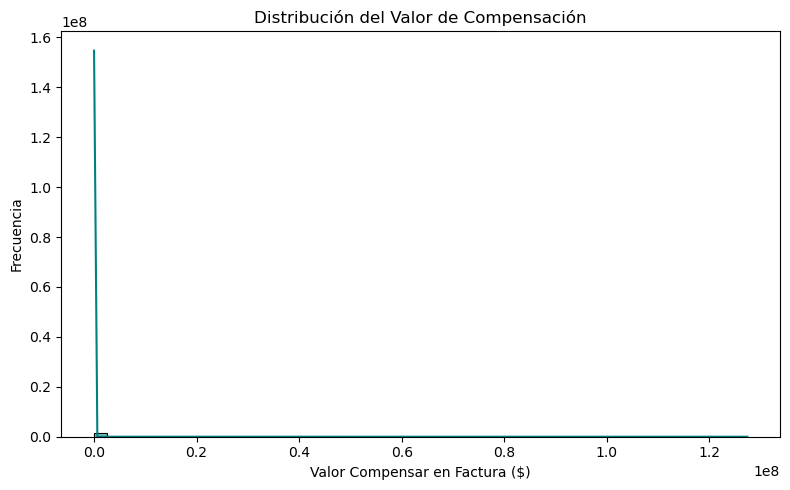

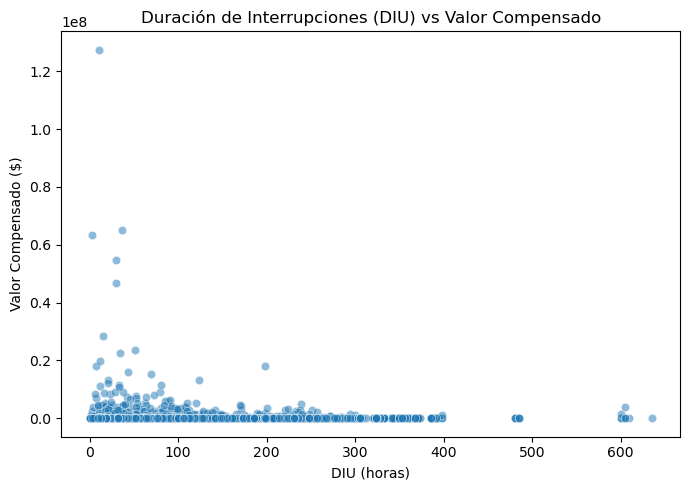

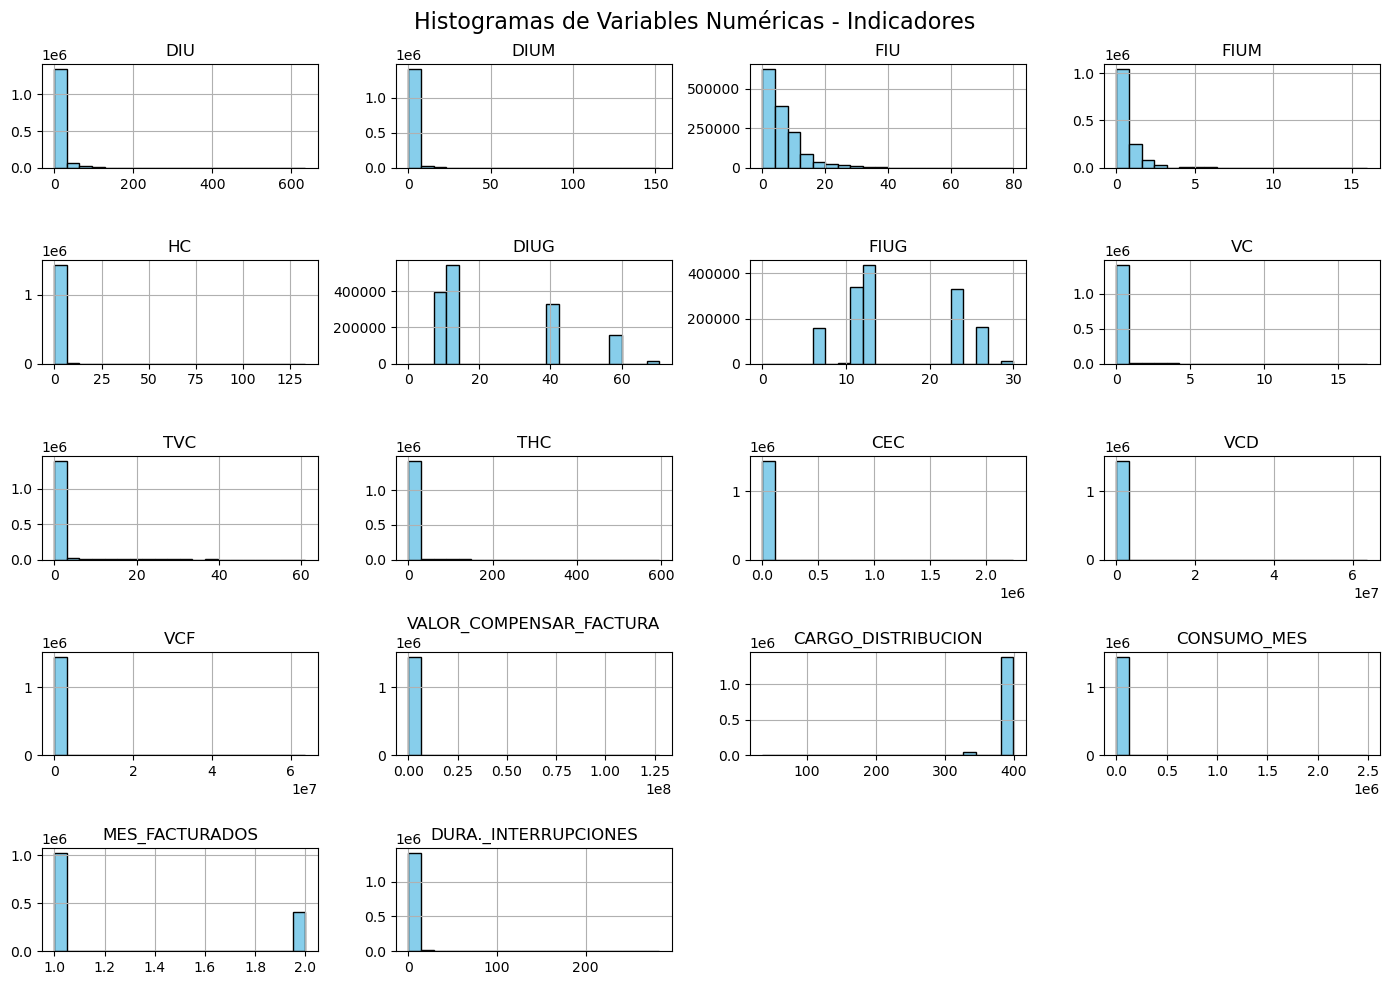


Generando gráficos de frecuencia para las variables categóricas...


C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1256154882.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


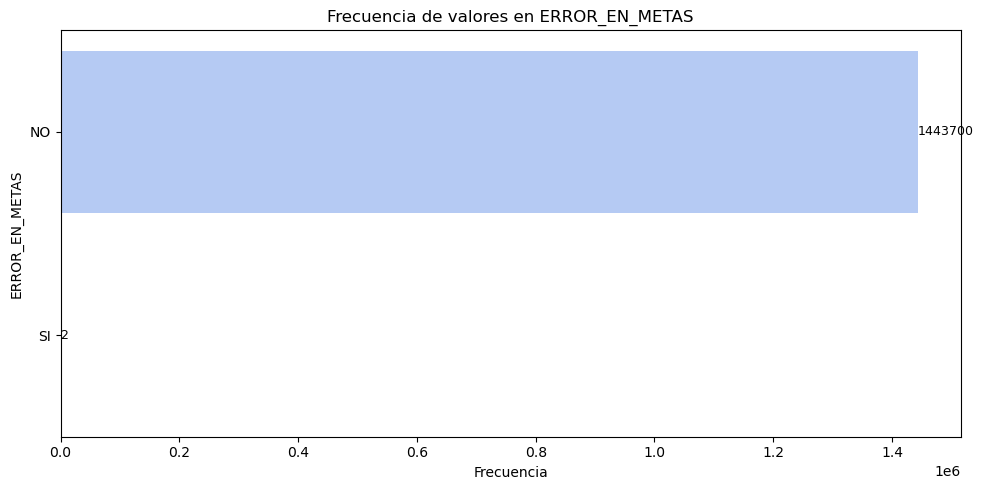

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1256154882.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


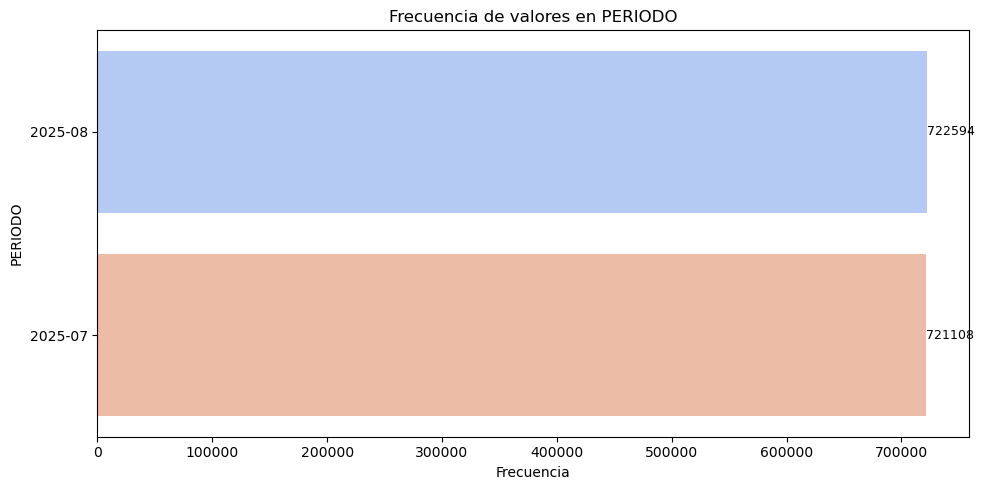

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1256154882.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


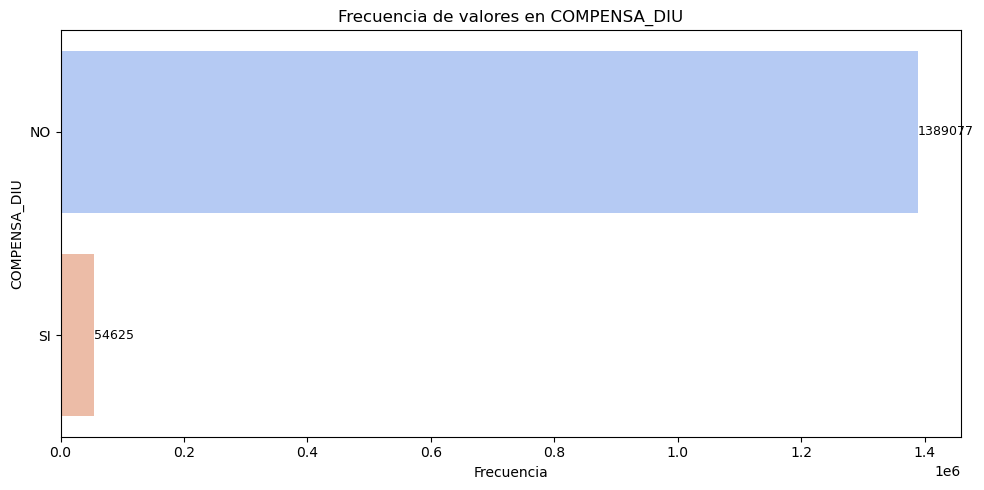

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1256154882.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


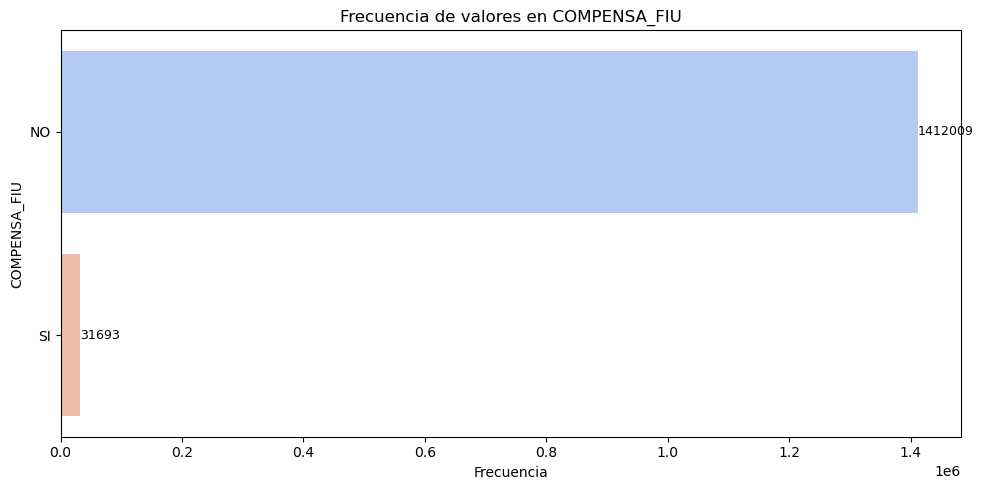

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1256154882.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


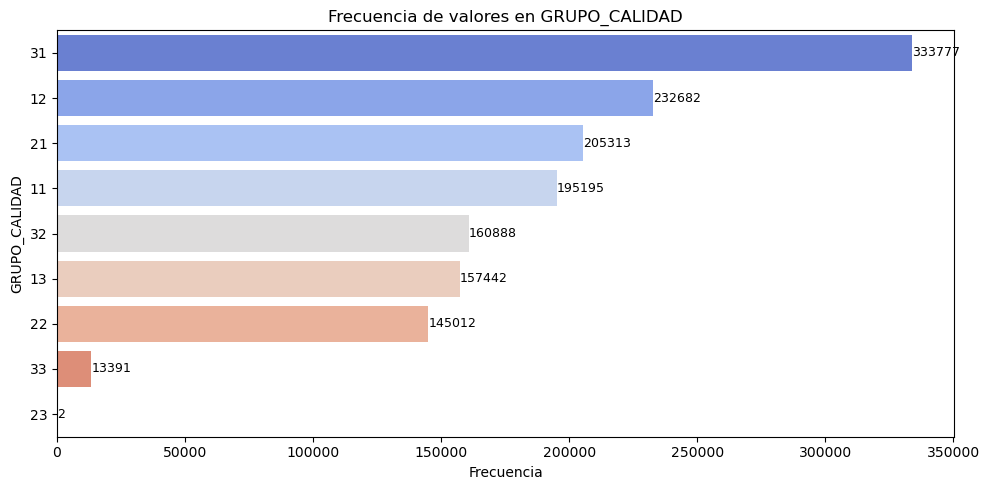

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1256154882.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


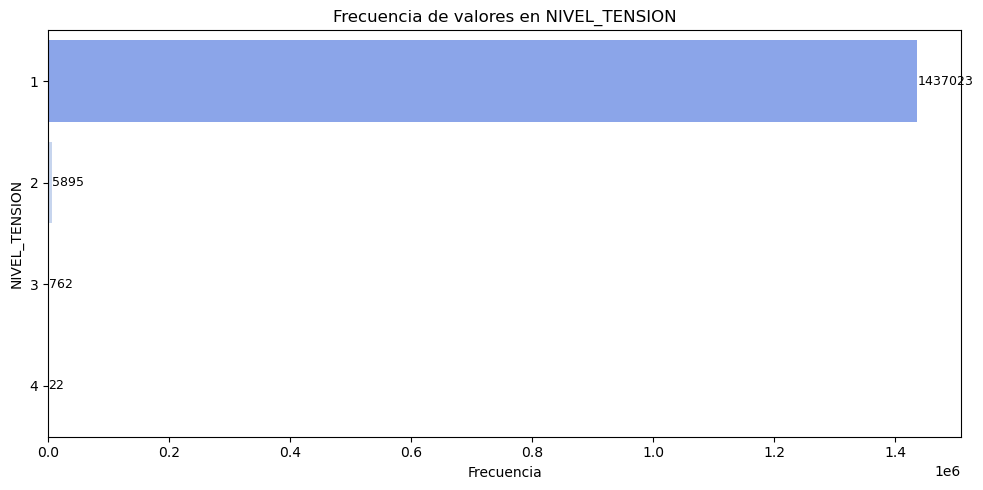

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1256154882.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


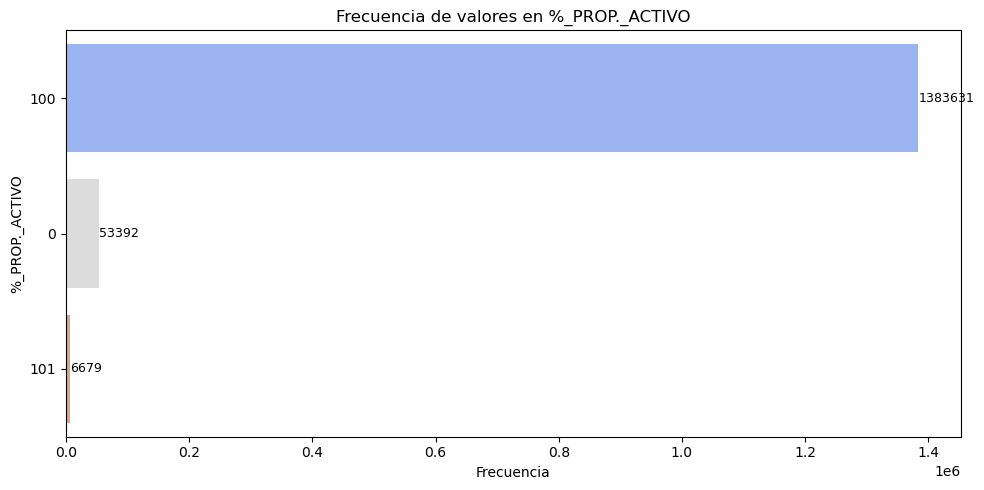

In [21]:
def explorar_indicadores(df):
    print("=== EXPLORACIÓN DE LA BASE DE INDICADORES ===\n")

    # Columnas que deben tratarse como categóricas aunque sean numéricas
    cols_categoricas = [
        'GRUPO_CALIDAD', 'NIVEL_TENSION', '%_PROP._ACTIVO', 'ID_MERCADO', 
        'OPERADOR_RED', 'PERIODO'
    ]

    # Convertirlas a tipo string si existen
    for c in cols_categoricas:
        if c in df.columns:
            df[c] = df[c].astype(str)

    # Asegurar que NIU sea string
    if 'NIU' in df.columns:
        df['NIU'] = df['NIU'].astype(str).str.strip()

    # Seleccionar variables numéricas y categóricas
    numericas = df.select_dtypes(include=['number']).columns
    categoricas = df.select_dtypes(include=['object']).columns

    # Total de valores faltantes
    faltantes = df.isnull().sum().sum()
    print(f'Número de columnas numéricas reales: {len(numericas)}')
    print(f'Número de columnas categóricas: {len(categoricas)}')
    print(f'Total de valores faltantes: {faltantes}\n')

    # Estadísticas descriptivas de las variables numéricas
    if len(numericas) > 0:
        print("Estadísticas descriptivas de las variables numéricas:")
        print(df[numericas].describe().T)
    else:
        print("No hay variables numéricas continuas para describir.\n")

    # --- Visualizaciones principales ---
    if 'VALOR_COMPENSAR_FACTURA' in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df['VALOR_COMPENSAR_FACTURA'].dropna(), bins=50, kde=True, color='teal')
        plt.title('Distribución del Valor de Compensación')
        plt.xlabel('Valor Compensar en Factura ($)')
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

    if 'DIU' in df.columns and 'VALOR_COMPENSAR_FACTURA' in df.columns:
        plt.figure(figsize=(7, 5))
        sns.scatterplot(x='DIU', y='VALOR_COMPENSAR_FACTURA', data=df, alpha=0.5)
        plt.title('Duración de Interrupciones (DIU) vs Valor Compensado')
        plt.xlabel('DIU (horas)')
        plt.ylabel('Valor Compensado ($)')
        plt.tight_layout()
        plt.show()

    if len(numericas) > 0:
        df[numericas].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
        plt.suptitle('Histogramas de Variables Numéricas - Indicadores', fontsize=16)
        plt.tight_layout()
        plt.show()

    # --- Gráficos automáticos para variables categóricas ---
    print("\nGenerando gráficos de frecuencia para las variables categóricas...")
    for col in categoricas:
        if df[col].nunique() > 1 and df[col].nunique() <= 30:
            plt.figure(figsize=(10, 5))
            ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')
            plt.title(f'Frecuencia de valores en {col}')
            plt.xlabel('Frecuencia')
            plt.ylabel(col)
            for p in ax.patches:
                ancho = p.get_width()
                ax.annotate(f'{int(ancho)}', (ancho + 0.5, p.get_y() + p.get_height()/2),
                            ha='left', va='center', fontsize=9, color='black')
            plt.tight_layout()
            plt.show()

explorar_indicadores(indicadores)

=== EXPLORACIÓN DE LA BASE DE CLIENTES ===

Número de columnas numéricas reales: 1
Número de columnas categóricas: 31
Total de valores faltantes: 4401948

Estadísticas descriptivas de las variables numéricas reales:
                count       mean         std   min  25%   50%   75%     max
CAPAC_AUTOGEN  2671.0  49.239105  203.125178  0.01  5.0  12.0  99.5  6042.0


C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='NIVEL_TENSION', data=df, palette='viridis')


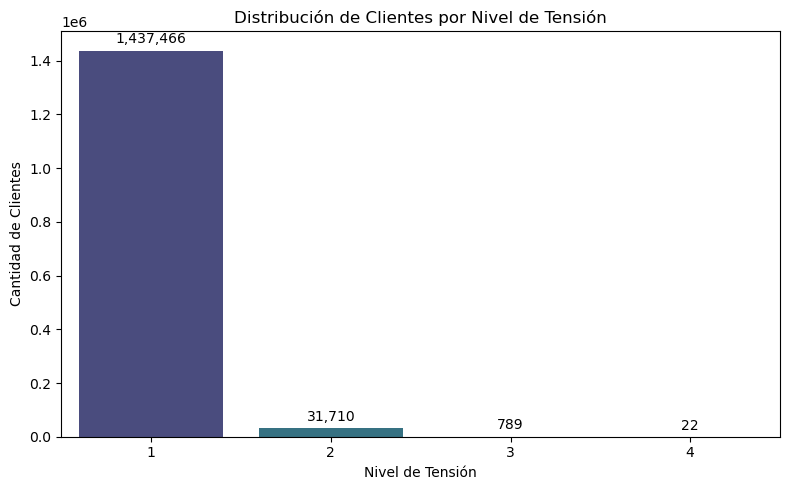

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TIPO_CONEXION', data=df, palette='Set2')


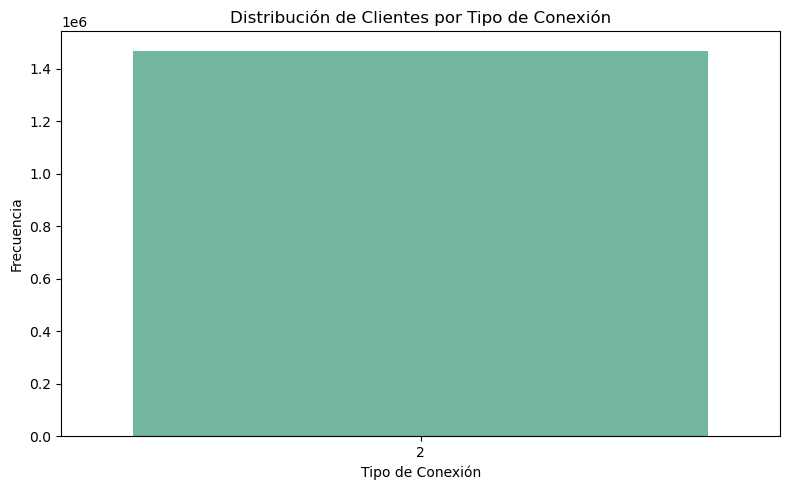

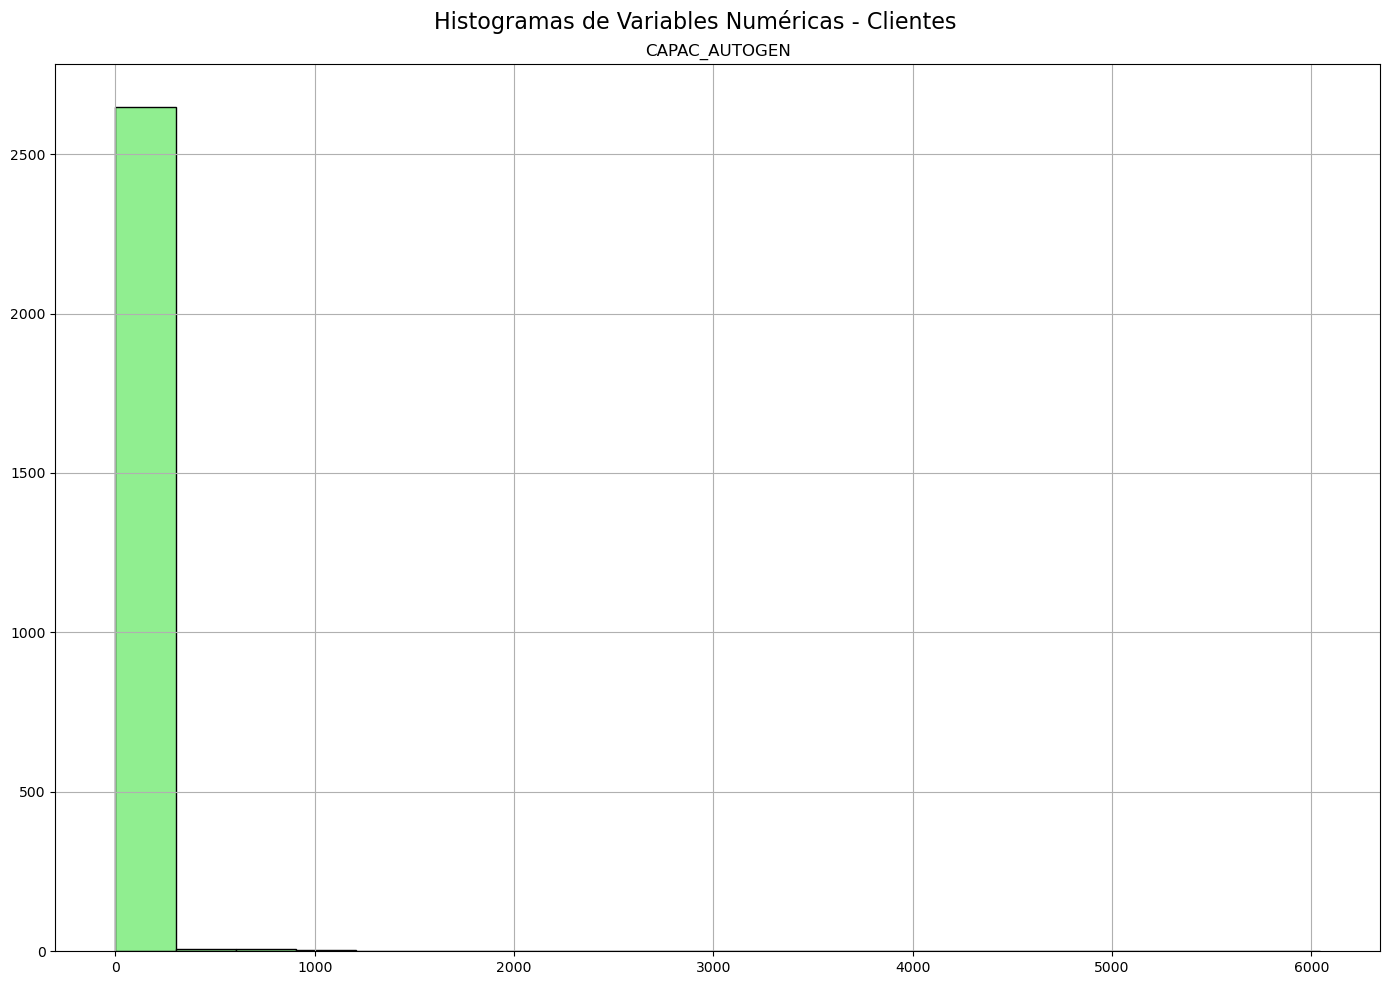


Generando gráficos de frecuencia para las variables categóricas...


C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


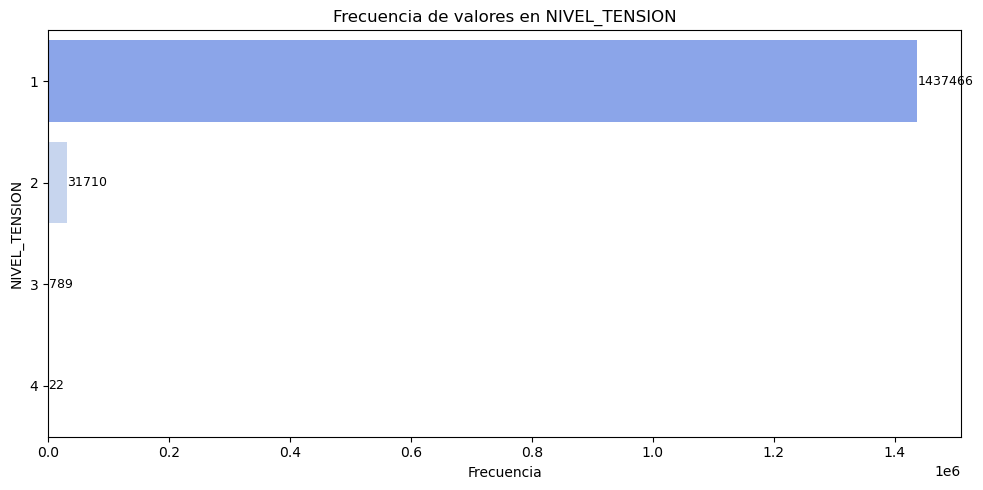

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


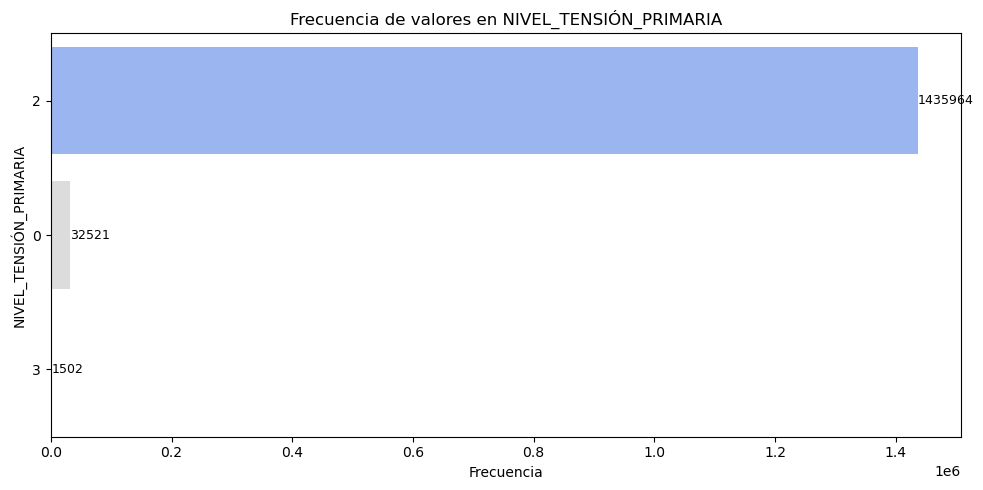

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


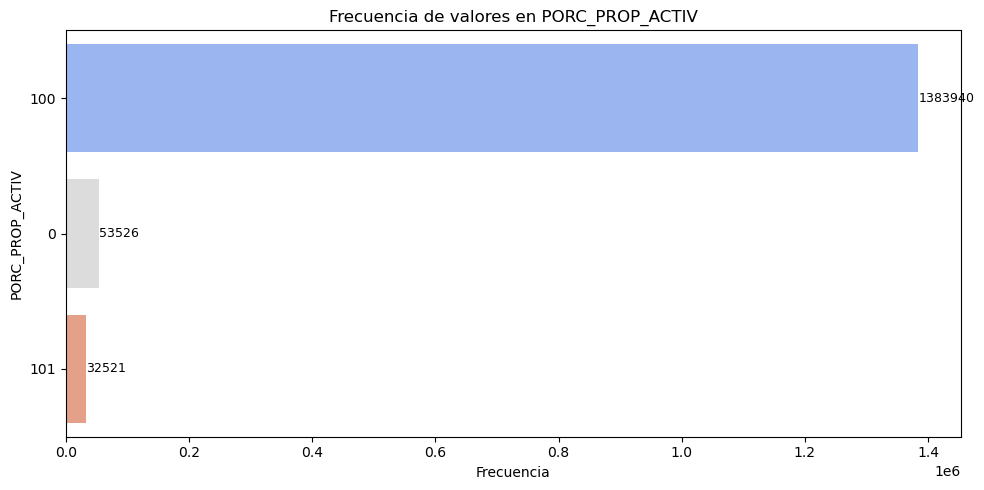

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


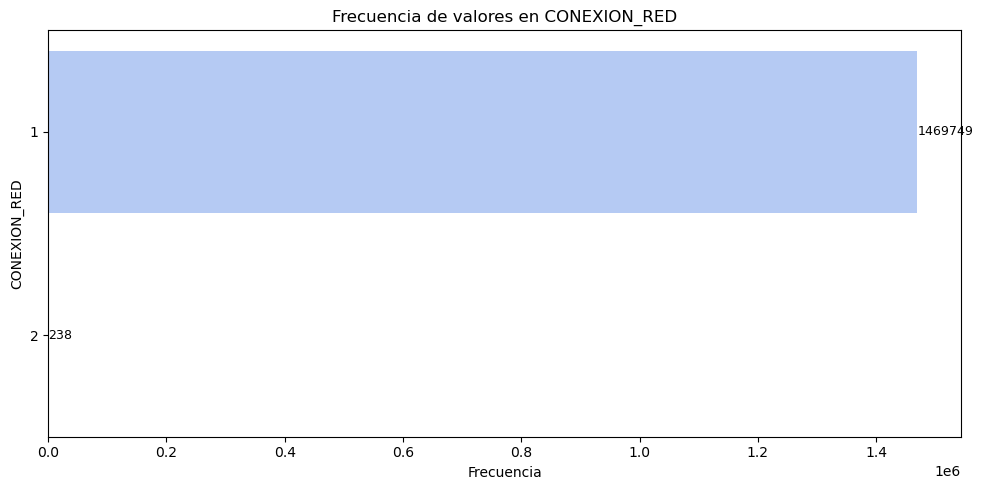

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


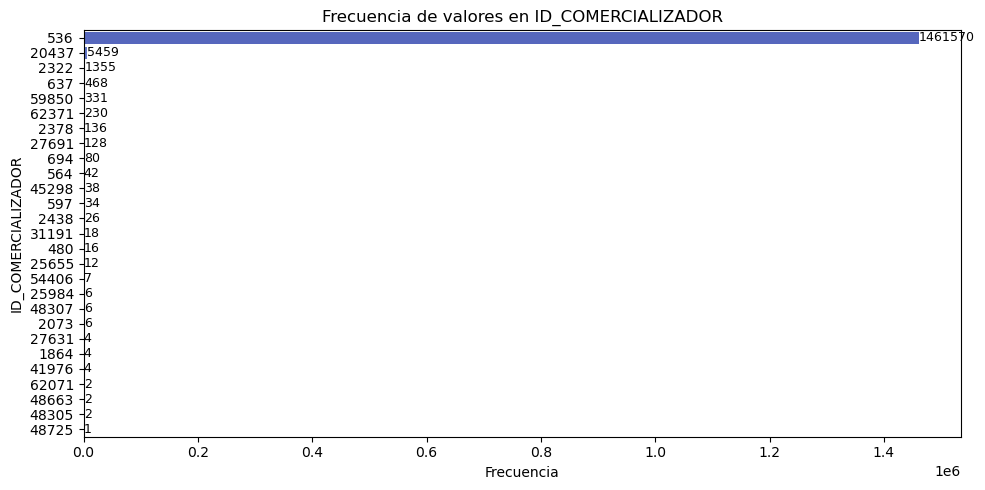

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


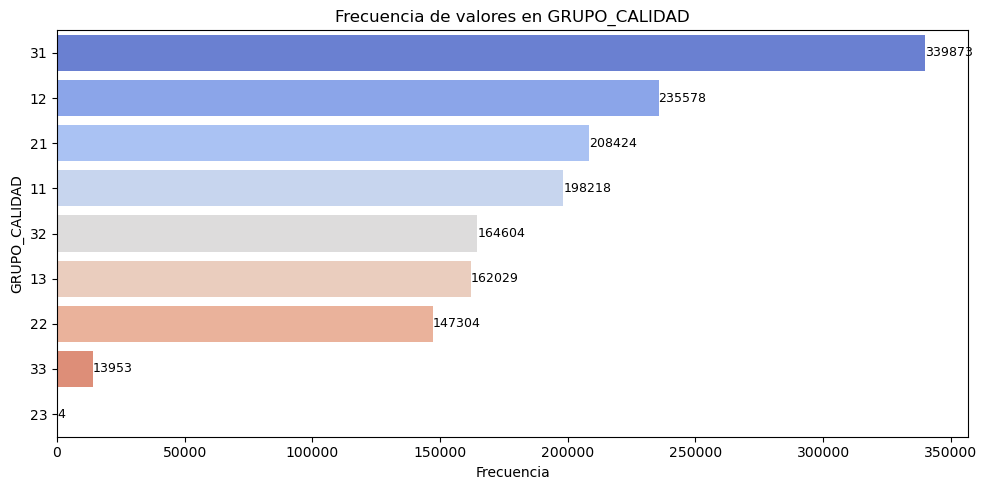

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


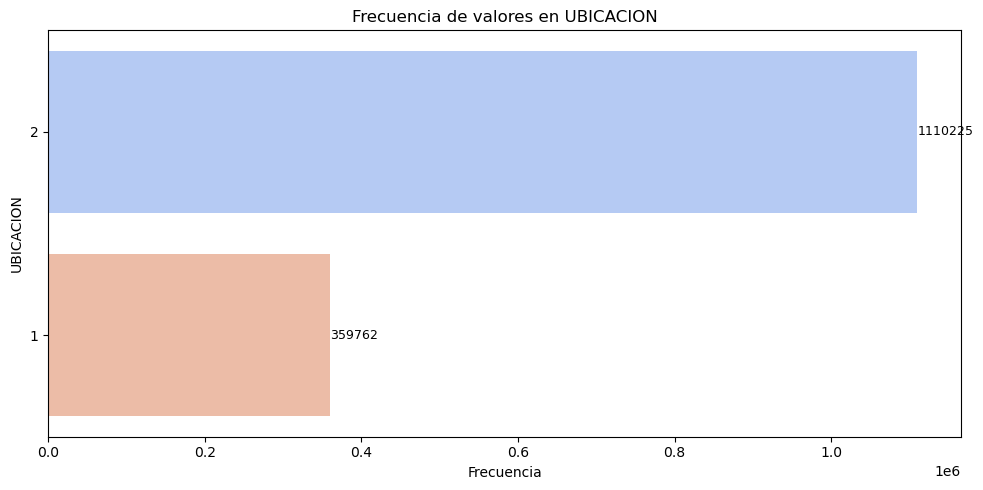

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


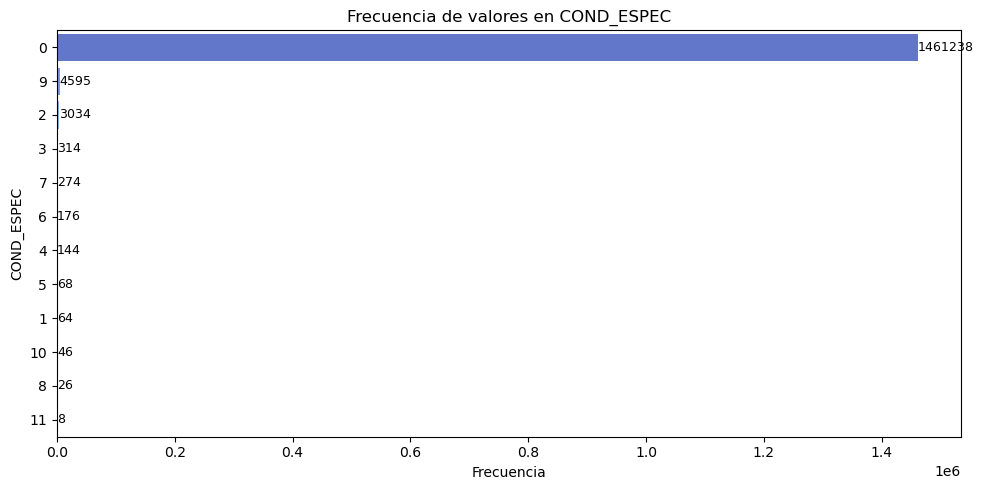

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


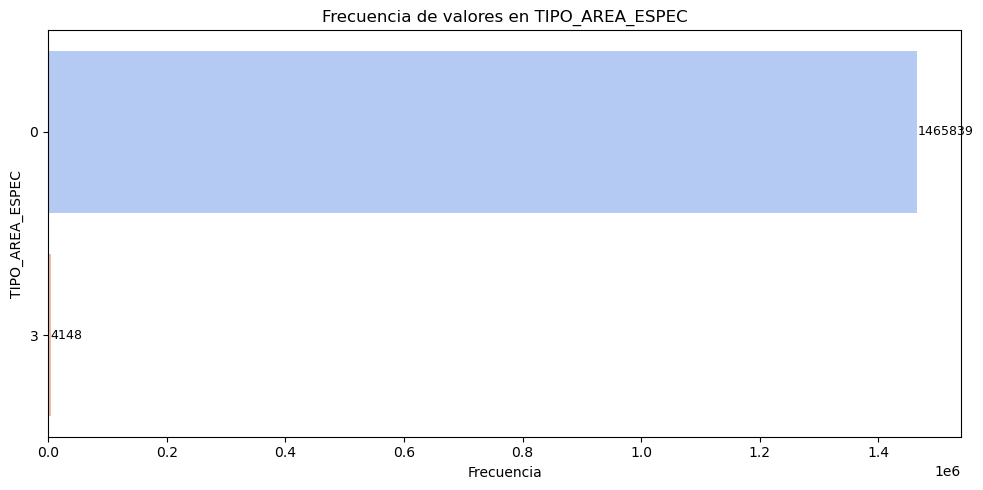

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


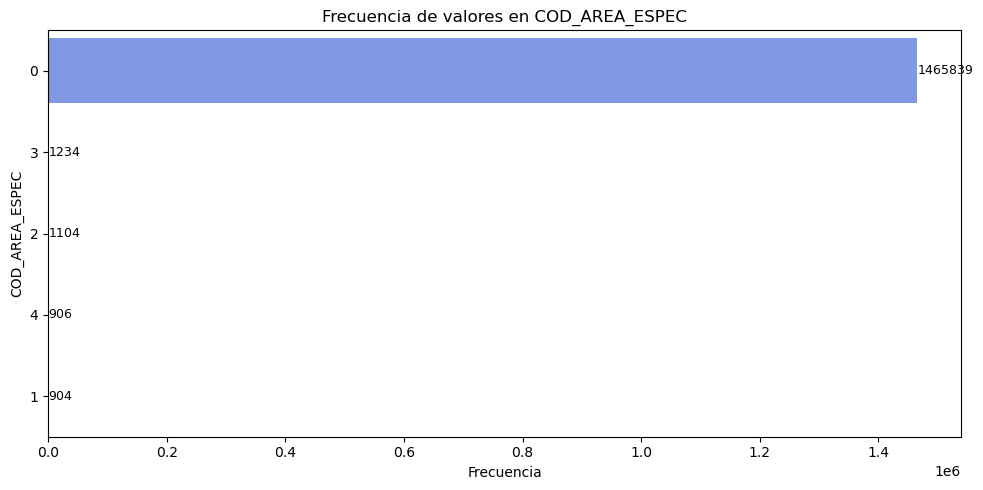

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


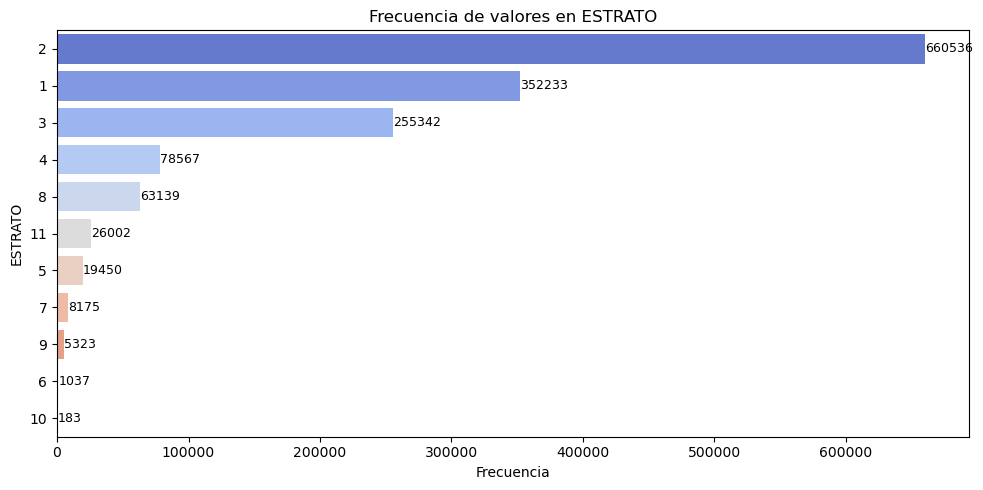

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


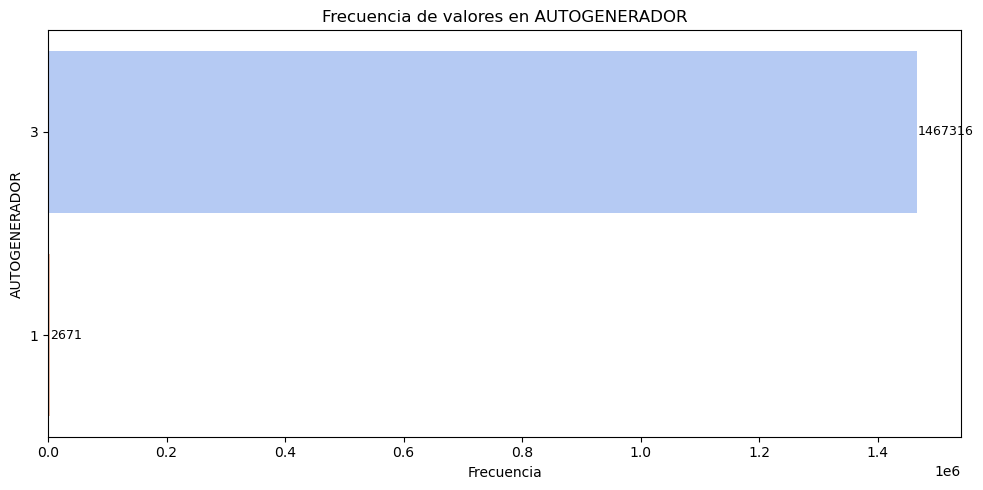

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


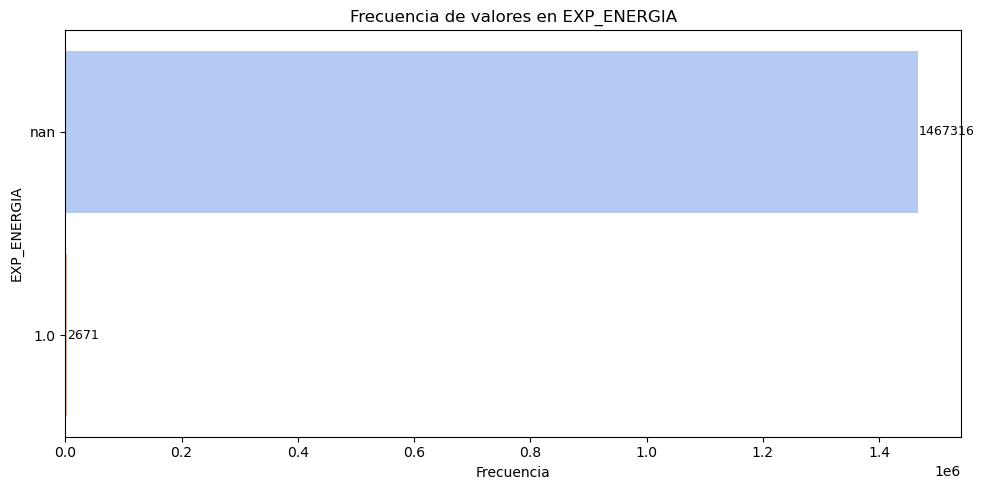

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


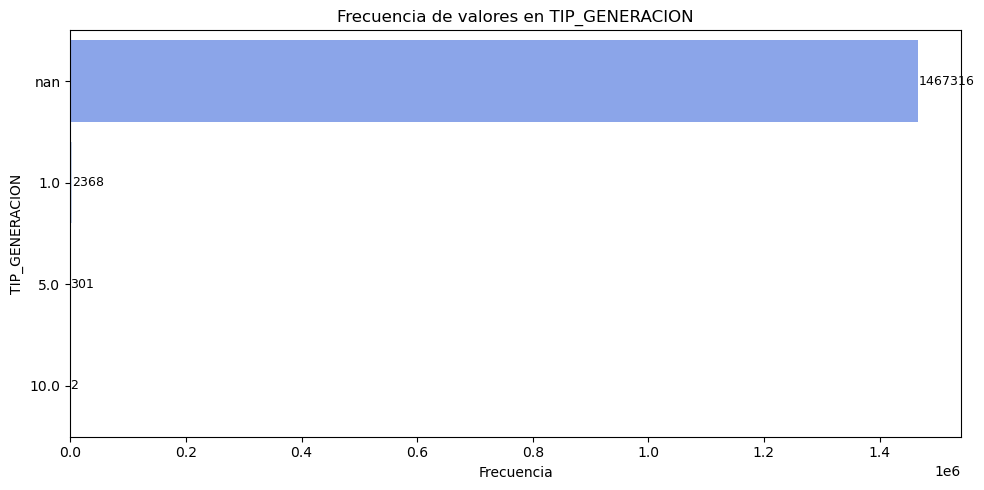

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


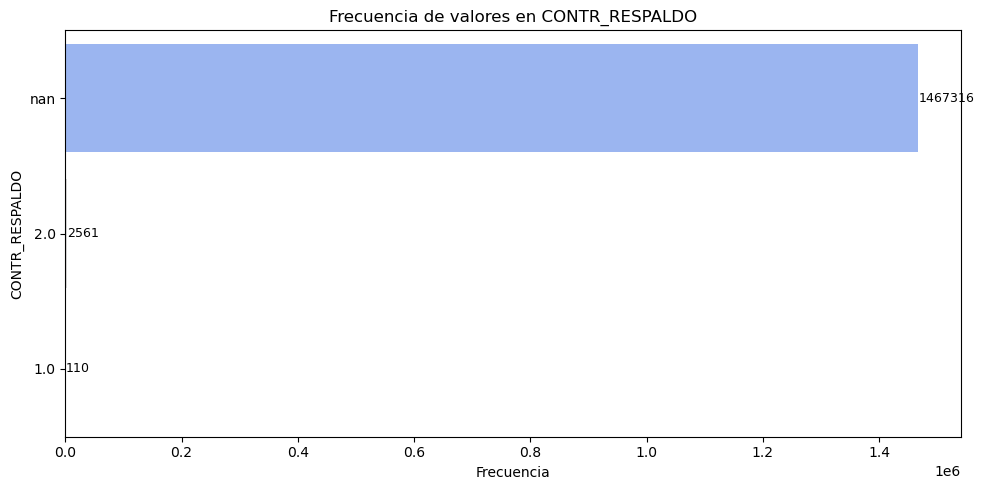

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


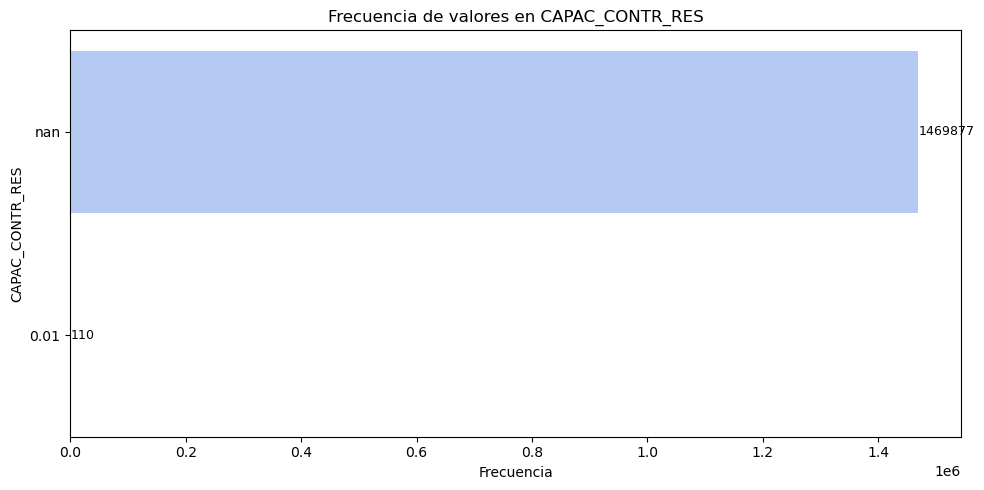

C:\Users\fabil\AppData\Local\Temp\ipykernel_12432\1445317604.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')


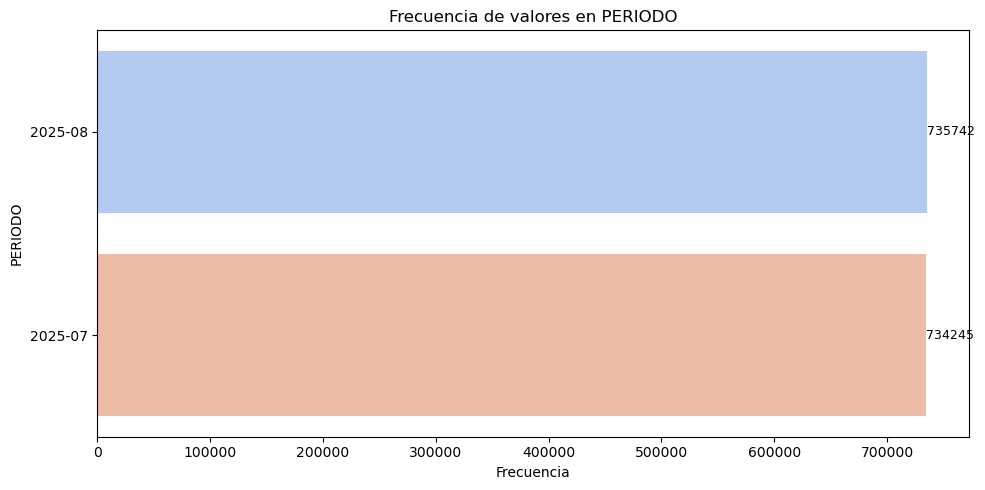

In [22]:
def explorar_clientes(df):
    print("=== EXPLORACIÓN DE LA BASE DE CLIENTES ===\n")

    # Columnas que deben tratarse como categóricas aunque sean numéricas
    cols_categoricas = [
        'TIPO_CONEXION', 'NIVEL_TENSION', 'NIVEL_TENSIÓN_PRIMARIA', 'PORC_PROP_ACTIV',
        'CONEXION_RED', 'ID_COMERCIALIZADOR', 'ID_MERCADO', 'GRUPO_CALIDAD',
        'COD_CIRCUITO_LINEA', 'COD_DANE', 'UBICACION', 'COND_ESPEC', 'TIPO_AREA_ESPEC',
        'COD_AREA_ESPEC', 'ESTRATO', 'ALTITUD', 'LONGITUD', 'LATITUD',
        'AUTOGENERADOR', 'EXP_ENERGIA', 'TIP_GENERACION', 'CONTR_RESPALDO', 'CAPAC_CONTR_RES'
    ]

    # Convertirlas a tipo string si existen
    for c in cols_categoricas:
        if c in df.columns:
            df[c] = df[c].astype(str)

    # Excluir las variables geográficas de las estadísticas
    excluir = ['LATITUD', 'LONGITUD', 'ALTITUD', 'ALTITUD_REAL']  # si existe

    numericas = df.select_dtypes(include=['number']).columns
    numericas = [col for col in numericas if col not in excluir]
    categoricas = df.select_dtypes(include=['object']).columns

    # Valores faltantes
    faltantes = df.isnull().sum().sum()
    print(f'Número de columnas numéricas reales: {len(numericas)}')
    print(f'Número de columnas categóricas: {len(categoricas)}')
    print(f'Total de valores faltantes: {faltantes}\n')

    # Estadísticas descriptivas
    if len(numericas) > 0:
        print("Estadísticas descriptivas de las variables numéricas reales:")
        print(df[numericas].describe().T)
    else:
        print("No hay variables numéricas continuas para describir.\n")

    # --- Visualizaciones principales ---
    if 'NIVEL_TENSION' in df.columns:
        plt.figure(figsize=(8, 5))
        ax = sns.countplot(x='NIVEL_TENSION', data=df, palette='viridis')
        plt.title('Distribución de Clientes por Nivel de Tensión')
        plt.xlabel('Nivel de Tensión')
        plt.ylabel('Cantidad de Clientes')
        for p in ax.patches:
            ax.annotate(f'{p.get_height():,.0f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                        textcoords='offset points')
        plt.tight_layout()
        plt.show()

    if 'TIPO_CONEXION' in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x='TIPO_CONEXION', data=df, palette='Set2')
        plt.title('Distribución de Clientes por Tipo de Conexión')
        plt.xlabel('Tipo de Conexión')
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

    # Histogramas de variables numéricas
    if len(numericas) > 0:
        df[numericas].hist(bins=20, figsize=(14, 10), color='lightgreen', edgecolor='black')
        plt.suptitle('Histogramas de Variables Numéricas - Clientes', fontsize=16)
        plt.tight_layout()
        plt.show()

    # --- NUEVO BLOQUE: Gráficos automáticos para todas las categóricas ---
    print("\nGenerando gráficos de frecuencia para las variables categóricas...")
    for col in categoricas:
        # Solo graficar si el número de categorías es razonable (<30)
        if df[col].nunique() > 1 and df[col].nunique() <= 30:
            plt.figure(figsize=(10, 5))
            ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')
            plt.title(f'Frecuencia de valores en {col}')
            plt.xlabel('Frecuencia')
            plt.ylabel(col)
            for p in ax.patches:
                ancho = p.get_width()
                ax.annotate(f'{int(ancho)}', (ancho + 0.5, p.get_y() + p.get_height()/2),
                            ha='left', va='center', fontsize=9, color='black')
            plt.tight_layout()
            plt.show()

explorar_clientes(clientes)

### Limpieza de bases de datos

In [7]:
# Valores faltantes en la base de clientes
faltantes_clientes = (
    clientes.isnull().sum()
    .reset_index()
    .rename(columns={'index': 'Columna', 0: 'Valores_Faltantes'})
)
faltantes_clientes

,Columna,Valores_Faltantes
0,NIU,0
1,CODIGO_CONEXION,0
2,TIPO_CONEXION,0
3,NIVEL_TENSION,0
4,NIVEL_TENSIÓN_PRIMARIA,0
5,PORC_PROP_ACTIV,0
6,CONEXION_RED,0
7,ID_COMERCIALIZADOR,0
8,ID_MERCADO,0
9,GRUPO_CALIDAD,0


In [4]:
# Columnas con valores faltantes masivos (relacionadas con autogeneración)
cols_a_eliminar = [
    "EXP_ENERGIA",
    "CAPAC_AUTOGEN",
    "TIP_GENERACION",
    "COD_FRONTERA_EXPORT",
    "F_ENTRADA_GENERAR",
    "CONTR_RESPALDO",
    "CAPAC_CONTR_RES"
]

# Crear nueva base limpia
clientes_limpia = clientes.drop(columns=cols_a_eliminar).reset_index(drop=True)

# Confirmar resultados
print("=== Limpieza completada ===")
print(f"Filas totales: {len(clientes_limpia):,}")
print(f"Columnas antes: {clientes.shape[1]}  →  después: {clientes_limpia.shape[1]}")
print("Columnas eliminadas:", cols_a_eliminar)

=== Limpieza completada ===
Filas totales: 1,469,987
Columnas antes: 34  →  después: 27
Columnas eliminadas: ['EXP_ENERGIA', 'CAPAC_AUTOGEN', 'TIP_GENERACION', 'COD_FRONTERA_EXPORT', 'F_ENTRADA_GENERAR', 'CONTR_RESPALDO', 'CAPAC_CONTR_RES']


### Unión clientes vs indicadores

Dado que un cliente puede aparecer más de una vez en el df de clientes, sin embargo este aparecerá una sola vez en el de indicadores, se toma como referencia el df de indicadores y se hace el merge con clientes, pero dejando la info solo del primer registro.

Este ajuste se hace dado que un cliente puede cambiar de comercializador en un mes y cuando esto pasa se registra dos veces en el df clientes, sin embargo sus indicadores siguen siendo los mismos.

In [5]:
# --- Eliminar duplicados en clientes por NIU y PERIODO ---
clientes_dedup = clientes.drop_duplicates(subset=['NIU', 'PERIODO'], keep='first')

print(f"Clientes originales: {len(clientes):,}")
print(f"Clientes sin duplicados (NIU + PERIODO): {len(clientes_dedup):,}")

# --- Merge: base principal = indicadores ---
df_merged = pd.merge(
    indicadores,
    clientes_dedup,
    how='left',  # mantiene todos los registros de indicadores
    on=['NIU', 'PERIODO'],
    suffixes=('_x', '_y')
)

# --- Validaciones ---
print(f"\nRegistros en indicadores: {len(indicadores):,}")
print(f"Registros en df_merged:   {len(df_merged):,}")
print(f"Diferencia:               {len(indicadores) - len(df_merged)}")

# Comprobar duplicados en la base final
duplicados = df_merged.duplicated(subset=['NIU', 'PERIODO']).sum()
print(f"Duplicados por NIU y PERIODO en df_merged: {duplicados}")

# Distribución de periodos para verificar consistencia
print("\nConteo por PERIODO:")
print(df_merged['PERIODO'].value_counts().sort_index())

# Vista previa
df_merged.head(5)

Clientes originales: 1,469,987
Clientes sin duplicados (NIU + PERIODO): 1,469,614

Registros en indicadores: 1,443,702
Registros en df_merged:   1,443,702
Diferencia:               0
Duplicados por NIU y PERIODO en df_merged: 0

Conteo por PERIODO:
PERIODO
2025-07    721108
2025-08    722594
Name: count, dtype: int64


,ERROR_EN_METAS,OPERADOR_RED,PERIODO,NIU,DIU,DIUM,FIU,FIUM,HC,DIUG,...,AUTOGENERADOR,EXP_ENERGIA,CAPAC_AUTOGEN,TIP_GENERACION,COD_FRONTERA_EXPORT,F_ENTRADA_GENERAR,CONTR_RESPALDO,CAPAC_CONTR_RES,ARCHIVO_ORIGEN_y,TIPO_BASE_y
0,NO,CELSIA VALLE,2025-07,1000001,0.00000,0.0,0,0,0.0,10.25,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC1_07_2025_CELSIA_VALLE_V2.csv,clientes
1,NO,CELSIA VALLE,2025-07,1000005,13.29471,0.0,4,0,0.0,57.02,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC1_07_2025_CELSIA_VALLE_V2.csv,clientes
2,NO,CELSIA VALLE,2025-07,1000008,13.29471,0.0,4,0,0.0,57.02,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC1_07_2025_CELSIA_VALLE_V2.csv,clientes
3,NO,CELSIA VALLE,2025-07,1000009,13.29471,0.0,4,0,0.0,57.02,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC1_07_2025_CELSIA_VALLE_V2.csv,clientes
4,NO,CELSIA VALLE,2025-07,1000011,13.29471,0.0,4,0,0.0,57.02,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC1_07_2025_CELSIA_VALLE_V2.csv,clientes


In [6]:
base_merged_sin_nulos = df_merged.dropna(axis=1).reset_index(drop=True)

# Confirmar resultados
print("=== Limpieza completada ===")
print(f"Filas originales: {len(df_merged):,}")
print(f"Filas después de eliminar nulos: {len(base_merged_sin_nulos):,}")
print(f"Columnas eliminadas: {df_merged.shape[1] - base_merged_sin_nulos.shape[1]:,}")

=== Limpieza completada ===
Filas originales: 1,443,702
Filas después de eliminar nulos: 1,443,702
Columnas eliminadas: 32


In [11]:
base_merged_sin_nulos

,ERROR_EN_METAS,OPERADOR_RED,PERIODO,NIU,DIU,DIUM,FIU,FIUM,HC,DIUG,...,GRUPO_CALIDAD_x,NIVEL_TENSION_x,CARGO_DISTRIBUCION,CONSUMO_MES,MES_FACTURADOS,DURA._INTERRUPCIONES,%_PROP._ACTIVO,ID_MERCADO_x,ARCHIVO_ORIGEN_x,TIPO_BASE_x
0,NO,CELSIA VALLE,2025-07,1000001,0.00000,0.00000,0,0,0.0,10.25,...,12,1,398.997,167.0,1,0.00055,100,561,Compensacion_2025_07.csv,indicadores
1,NO,CELSIA VALLE,2025-07,1000005,13.29471,0.00000,4,0,0.0,57.02,...,32,1,398.997,0.0,2,12.93388,100,561,Compensacion_2025_07.csv,indicadores
2,NO,CELSIA VALLE,2025-07,1000008,13.29471,0.00000,4,0,0.0,57.02,...,32,1,398.997,0.0,2,12.93388,100,561,Compensacion_2025_07.csv,indicadores
3,NO,CELSIA VALLE,2025-07,1000009,13.29471,0.00000,4,0,0.0,57.02,...,32,1,398.997,0.0,2,12.93388,100,561,Compensacion_2025_07.csv,indicadores
4,NO,CELSIA VALLE,2025-07,1000011,13.29471,0.00000,4,0,0.0,57.02,...,32,1,398.997,0.0,2,12.93388,100,561,Compensacion_2025_07.csv,indicadores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443697,NO,CELSIA VALLE,2025-08,9887654,5.47000,0.00000,4,0,0.0,40.96,...,31,1,398.370,182.0,2,1.33277,100,561,Compensacion_2025_08.csv,indicadores
1443698,NO,CELSIA VALLE,2025-08,990920112578,13.50000,2.20583,27,3,0.0,57.02,...,32,1,398.370,0.0,2,0.00916,100,561,Compensacion_2025_08.csv,indicadores
1443699,NO,CELSIA VALLE,2025-08,993320550,3.50000,0.00000,3,0,0.0,40.96,...,31,1,326.865,0.0,2,0.00972,0,561,Compensacion_2025_08.csv,indicadores
1443700,NO,CELSIA VALLE,2025-08,9945573156,2.91000,0.00000,3,0,0.0,40.96,...,31,1,398.370,0.0,2,3.87860,100,561,Compensacion_2025_08.csv,indicadores


In [7]:
base_final_limpia = base_merged_sin_nulos.drop(columns=["OPERADOR_RED", "ARCHIVO_ORIGEN_x", "TIPO_BASE_x"]).reset_index(drop=True)

In [8]:
base_final_limpia.columns

Index(['ERROR_EN_METAS', 'PERIODO', 'NIU', 'DIU', 'DIUM', 'FIU', 'FIUM', 'HC',
       'DIUG', 'FIUG', 'VC', 'TVC', 'THC', 'COMPENSA_DIU', 'COMPENSA_FIU',
       'CEC', 'VCD', 'VCF', 'VALOR_COMPENSAR_FACTURA', 'GRUPO_CALIDAD_x',
       'NIVEL_TENSION_x', 'CARGO_DISTRIBUCION', 'CONSUMO_MES',
       'MES_FACTURADOS', 'DURA._INTERRUPCIONES', '%_PROP._ACTIVO',
       'ID_MERCADO_x'],
      dtype='object')

In [9]:
# Variables de compensación
vars_compensacion = ['COMPENSA_DIU', 'COMPENSA_FIU', 'VALOR_COMPENSAR_FACTURA']

# Mostrar las primeras filas
print("=== Primeros registros de las variables de compensación ===")
print(base_final_limpia[vars_compensacion].head(20))

=== Primeros registros de las variables de compensación ===
   COMPENSA_DIU COMPENSA_FIU  VALOR_COMPENSAR_FACTURA
0            NO           NO                      0.0
1            NO           NO                      0.0
2            NO           NO                      0.0
3            NO           NO                      0.0
4            NO           NO                      0.0
5            NO           NO                      0.0
6            NO           NO                      0.0
7            NO           NO                      0.0
8            NO           NO                      0.0
9            NO           NO                      0.0
10           SI           NO                      0.0
11           SI           NO                      0.0
12           SI           NO                      0.0
13           NO           NO                      0.0
14           NO           NO                      0.0
15           NO           NO                      0.0
16           NO       

In [10]:
base_final_limpia["COMPENSADO"] = (
    (base_final_limpia["COMPENSA_DIU"] == 'SI') | 
    (base_final_limpia["COMPENSA_FIU"] == 'SI')
).astype(int)

In [11]:
base_final_limpia["COMPENSADO"].unique()

array([0, 1])

In [12]:
base_final_limpia["COMPENSADO"].value_counts(normalize=True) * 100

COMPENSADO
0    95.231841
1     4.768159
Name: proportion, dtype: float64

In [13]:
# Separar clases
df_mayor = base_final_limpia[base_final_limpia.COMPENSADO == 0]
df_menor = base_final_limpia[base_final_limpia.COMPENSADO == 1]

# Submuestrear la clase mayoritaria
df_mayor_down = resample(df_mayor,
                         replace=False,
                         n_samples=len(df_menor)*2,  # relación 2:1
                         random_state=42)

# Combinar
base_balanceada = pd.concat([df_mayor_down, df_menor]).sample(frac=1, random_state=42).reset_index(drop=True)

# Confirmar
base_balanceada["COMPENSADO"].value_counts(normalize=True) * 100

COMPENSADO
0    66.666667
1    33.333333
Name: proportion, dtype: float64

In [14]:
base_balanceada

,ERROR_EN_METAS,PERIODO,NIU,DIU,DIUM,FIU,FIUM,HC,DIUG,FIUG,...,VALOR_COMPENSAR_FACTURA,GRUPO_CALIDAD_x,NIVEL_TENSION_x,CARGO_DISTRIBUCION,CONSUMO_MES,MES_FACTURADOS,DURA._INTERRUPCIONES,%_PROP._ACTIVO,ID_MERCADO_x,COMPENSADO
0,NO,2025-08,3343865,39.48000,24.15722,12,4,0.00000,70.66,30,...,0.000,33,1,398.370,211.0,1,8.43999,100,561,0
1,NO,2025-08,1131044,26.40000,1.58611,17,2,0.00000,57.02,26,...,0.000,32,1,398.370,262.0,2,1.95194,100,561,0
2,NO,2025-07,20230081949,2.66776,0.00000,7,0,0.00000,40.96,23,...,0.000,31,1,398.997,168.0,1,0.00138,100,561,0
3,NO,2025-08,1909237,41.18000,17.44361,25,5,0.22000,40.96,23,...,0.000,31,1,398.370,0.0,2,49.71555,100,561,1
4,NO,2025-08,1397178,1.19000,0.00000,4,0,0.00000,10.25,13,...,0.000,12,1,398.370,239.0,1,0.00027,100,561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206509,NO,2025-08,1030994,1.00000,0.00000,1,0,0.00000,10.25,13,...,0.000,12,1,398.370,107.0,1,0.00027,100,561,0
206510,NO,2025-08,1418619,5.72000,0.00000,5,0,0.00000,10.87,11,...,0.000,11,1,398.370,163.0,1,0.00083,100,561,0
206511,NO,2025-08,1681617,0.43000,0.18083,2,1,0.00000,11.10,12,...,0.000,21,1,398.370,360.0,1,0.03333,100,561,0
206512,NO,2025-07,1725882,17.17081,0.00000,3,0,0.00081,8.49,7,...,79.799,13,1,398.997,1.0,1,0.00000,100,561,1


In [15]:
base_balanceada.columns

Index(['ERROR_EN_METAS', 'PERIODO', 'NIU', 'DIU', 'DIUM', 'FIU', 'FIUM', 'HC',
       'DIUG', 'FIUG', 'VC', 'TVC', 'THC', 'COMPENSA_DIU', 'COMPENSA_FIU',
       'CEC', 'VCD', 'VCF', 'VALOR_COMPENSAR_FACTURA', 'GRUPO_CALIDAD_x',
       'NIVEL_TENSION_x', 'CARGO_DISTRIBUCION', 'CONSUMO_MES',
       'MES_FACTURADOS', 'DURA._INTERRUPCIONES', '%_PROP._ACTIVO',
       'ID_MERCADO_x', 'COMPENSADO'],
      dtype='object')

In [16]:
# Lista de columnas a eliminar
cols_drop = [
    'ERROR_EN_METAS', 'OPERADOR_RED', 'ID_MERCADO_x',
    'ARCHIVO_ORIGEN_x', 'TIPO_BASE_x', 'CODIGO_CONEXION', 'TIPO_CONEXION','VALOR_COMPENSAR_FACTURA',
    'ID_COMERCIALIZADOR', 'COD_FRONTERA_COMERCIAL', 'COD_CIRCUITO_LINEA',
    'COD_TRANSFORMADOR', 'COD_DANE', 'COD_AREA_ESPEC', 'DIRECCION', 'PORC_PROP_ACTIV',  'TVC', 'HC', 'DURA._INTERRUPCIONES','THC',
    'TIPO_AREA_ESPEC', 'ALTITUD', 'LONGITUD', 'LATITUD','COMPENSA_DIU', 'COMPENSA_FIU', 'FIU', 'FIUM', 'DIU', 'DIUM', 'VC',
]

# Eliminar duplicadas si se repiten en la lista
cols_drop = list(set(cols_drop))

# Crear nueva base sin esas columnas
base_balanceada_mod = base_balanceada.drop(columns=cols_drop, errors='ignore')

# Confirmar cambios
print("Columnas eliminadas:", len(cols_drop))
print("Columnas finales:", len(base_balanceada_mod.columns))
base_balanceada_mod.columns

Columnas eliminadas: 31
Columnas finales: 14


Index(['PERIODO', 'NIU', 'DIUG', 'FIUG', 'CEC', 'VCD', 'VCF',
       'GRUPO_CALIDAD_x', 'NIVEL_TENSION_x', 'CARGO_DISTRIBUCION',
       'CONSUMO_MES', 'MES_FACTURADOS', '%_PROP._ACTIVO', 'COMPENSADO'],
      dtype='object')

In [17]:
# --- 1) Definir las columnas "categóricas" deseadas
cols_categoricas = [
    'GRUPO_CALIDAD_x', 'NIVEL_TENSION_x', 'MES_FACTURADOS',
    '%_PROP._ACTIVO', 'NIVEL_TENSIÓN_PRIMARIA', 'CONEXION_RED','PERIODO',
    'UBICACION', 'COND_ESPEC', 'ESTRATO', 'AUTOGENERADOR', 'COMPENSADO'
]

# --- 2) Separar existentes vs faltantes
existentes = [c for c in cols_categoricas if c in base_balanceada_mod.columns]
faltantes  = [c for c in cols_categoricas if c not in base_balanceada_mod.columns]

print("Categóricas encontradas:", existentes)
print("Categóricas faltantes:  ", faltantes)  # solo informativo

# --- 3) Convertir a string SOLO las que existen
base_balanceada_mod[existentes] = base_balanceada_mod[existentes].astype("string")

# Si COMPENSADO es tu variable objetivo, normalmente conviene dejarla numérica:
if "COMPENSADO" in base_balanceada_mod.columns:
    base_balanceada_mod["COMPENSADO"] = base_balanceada_mod["COMPENSADO"].astype(int)

# --- 4) Mostrar tipos solo de las columnas que existen
print(base_balanceada_mod[existentes].dtypes)

Categóricas encontradas: ['GRUPO_CALIDAD_x', 'NIVEL_TENSION_x', 'MES_FACTURADOS', '%_PROP._ACTIVO', 'PERIODO', 'COMPENSADO']
Categóricas faltantes:   ['NIVEL_TENSIÓN_PRIMARIA', 'CONEXION_RED', 'UBICACION', 'COND_ESPEC', 'ESTRATO', 'AUTOGENERADOR']
GRUPO_CALIDAD_x    string[python]
NIVEL_TENSION_x    string[python]
MES_FACTURADOS     string[python]
%_PROP._ACTIVO     string[python]
PERIODO            string[python]
COMPENSADO                  int32
dtype: object


In [18]:
# 1) Reconstruir una copia con la y dentro y asegurar tipo int
df_corr = base_balanceada_mod.copy()

# Si COMPENSADO no está, lo agregamos desde y (que ya usaste para modelar)
if 'COMPENSADO' not in df_corr.columns:
    df_corr['COMPENSADO'] = y.values  # y debe ser el mismo vector objetivo

# Asegurar que sea numérica
df_corr['COMPENSADO'] = df_corr['COMPENSADO'].astype(int)

# 2) Correlaciones solo con columnas numéricas
corrs = (
    df_corr.select_dtypes(include=['number'])
           .corr(numeric_only=True)['COMPENSADO']
           .sort_values(ascending=False)
)
print(corrs.head(20))

COMPENSADO            1.000000
FIUG                  0.158189
DIUG                  0.142596
VCD                   0.040497
CEC                   0.024939
VCF                   0.024825
CONSUMO_MES           0.013187
CARGO_DISTRIBUCION   -0.073835
Name: COMPENSADO, dtype: float64


In [19]:
base_balanceada_modf = base_balanceada_mod.drop(columns=['NIU']).reset_index(drop=True)
base_balanceada_modf.columns

Index(['PERIODO', 'DIUG', 'FIUG', 'CEC', 'VCD', 'VCF', 'GRUPO_CALIDAD_x',
       'NIVEL_TENSION_x', 'CARGO_DISTRIBUCION', 'CONSUMO_MES',
       'MES_FACTURADOS', '%_PROP._ACTIVO', 'COMPENSADO'],
      dtype='object')

Numéricas: 7
Categóricas: 4
Fitting 5 folds for each of 6 candidates, totalling 30 fits

=== Regresión Logística ===
Mejores hiperparámetros: {'clf__C': 10, 'clf__solver': 'liblinear'}
AUC: 0.9718861358485379
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     41303
           1       0.75      0.94      0.83     20652

    accuracy                           0.88     61955
   macro avg       0.86      0.89      0.87     61955
weighted avg       0.89      0.88      0.88     61955

Fitting 5 folds for each of 8 candidates, totalling 40 fits

=== Random Forest ===
Mejores hiperparámetros: {'clf__max_depth': 12, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
AUC: 0.9825153644671355
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     41303
           1       0.79      0.97      0.87     20652

    accuracy                           0.90     61955
   macro avg       0.88      0.92   

c:\Users\fabil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fabil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fabil\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fabil\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(X


=== LDA ===
Mejores hiperparámetros: {'clf__shrinkage': 'auto', 'clf__solver': 'lsqr'}
AUC: 0.6708933673040188
              precision    recall  f1-score   support

           0       0.72      0.86      0.78     41303
           1       0.54      0.32      0.40     20652

    accuracy                           0.68     61955
   macro avg       0.63      0.59      0.59     61955
weighted avg       0.66      0.68      0.66     61955



C:\Users\fabil\AppData\Local\Temp\ipykernel_19580\950041550.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=auc_scores, palette='viridis')


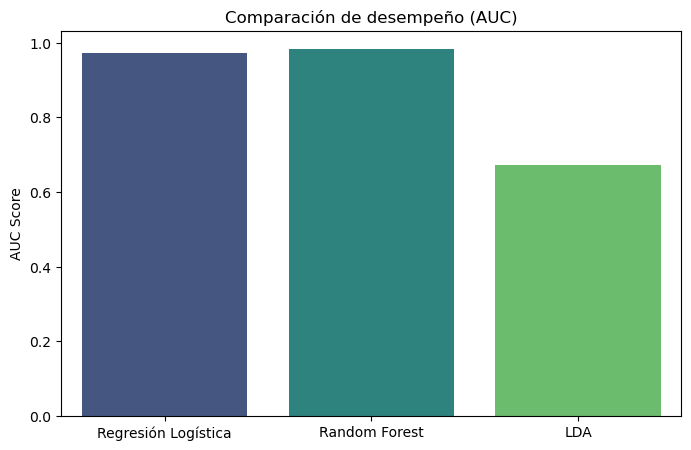

In [50]:
# ==========================================================
# 🚀 MODELOS OPTIMIZADOS SIN get_dummies
# ==========================================================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA  # ⬅️ reemplaza XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================================
# 1️⃣ Dividir variables
# ==========================================================
df = base_balanceada_modf.copy()

# Variable objetivo
y = df['COMPENSADO'].astype(int)
X = df.drop(columns=['COMPENSADO'])

# Identificar variables numéricas y categóricas
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numéricas:", len(num_cols))
print("Categóricas:", len(cat_cols))

# Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ==========================================================
# 2️⃣ Preprocesadores
# ==========================================================
# Variables categóricas con baja cardinalidad (≤30)
cardinalidades = X_train[cat_cols].nunique().sort_values()
low_cat = cardinalidades[cardinalidades <= 30].index.tolist()
high_cat = cardinalidades[cardinalidades > 30].index.tolist()

# Para Regresión Logística y LDA (escalado + one-hot de baja cardinalidad)
pre_lr = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat_low', OneHotEncoder(handle_unknown='ignore'), low_cat)
    ],
    remainder='drop'
)

# Para modelos de árboles (RF)
pre_tree = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols)
    ],
    remainder='drop'
)

# ==========================================================
# 3️⃣ Definición de pipelines y grids
# ==========================================================
pipe_lr = Pipeline([
    ('prep', pre_lr),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

pipe_rf = Pipeline([
    ('prep', pre_tree),
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# ⬇️ LDA en lugar de XGBoost
pipe_lda = Pipeline([
    ('prep', pre_lr),  # igual que LR: num escaladas + one-hot en cats de baja cardinalidad
    ('clf', LDA())
])

# Parámetros
grid_lr = {'clf__C': [0.1, 1, 10], 'clf__solver': ['lbfgs', 'liblinear']}
grid_rf = {'clf__n_estimators': [100, 200], 'clf__max_depth': [8, 12], 'clf__min_samples_split': [2, 5]}
# ⬇️ Grid para LDA (solvers y shrinkage; shrinkage solo aplica a 'lsqr')
grid_lda = {
    'clf__solver': ['svd', 'lsqr'],
    'clf__shrinkage': [None, 'auto']  # será ignorado si solver='svd'
}

# ==========================================================
# 4️⃣ Entrenamiento y validación
# ==========================================================
def entrenar_y_evaluar(modelo, grid, nombre):
    search = GridSearchCV(modelo, grid, cv=5, n_jobs=-1, scoring='roc_auc', verbose=1)
    search.fit(X_train, y_train)
    best = search.best_estimator_
    y_pred = best.predict(X_test)
    y_proba = best.predict_proba(X_test)[:, 1]
    print(f"\n=== {nombre} ===")
    print("Mejores hiperparámetros:", search.best_params_)
    print("AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))
    return roc_auc_score(y_test, y_proba)

auc_lr  = entrenar_y_evaluar(pipe_lr,  grid_lr,  "Regresión Logística")
auc_rf  = entrenar_y_evaluar(pipe_rf,  grid_rf,  "Random Forest")
auc_lda = entrenar_y_evaluar(pipe_lda, grid_lda, "LDA")

# ==========================================================
# 5️⃣ Comparación gráfica
# ==========================================================
modelos = ['Regresión Logística', 'Random Forest', 'LDA']
auc_scores = [auc_lr, auc_rf, auc_lda]

plt.figure(figsize=(8,5))
sns.barplot(x=modelos, y=auc_scores, palette='viridis')
plt.title('Comparación de desempeño (AUC)')
plt.ylabel('AUC Score')
plt.show()


## Espacio Fabian

In [20]:
base_balanceada_mod.columns

Index(['PERIODO', 'NIU', 'DIUG', 'FIUG', 'CEC', 'VCD', 'VCF',
       'GRUPO_CALIDAD_x', 'NIVEL_TENSION_x', 'CARGO_DISTRIBUCION',
       'CONSUMO_MES', 'MES_FACTURADOS', '%_PROP._ACTIVO', 'COMPENSADO'],
      dtype='object')

In [21]:
base_balanceada_mod_final = base_balanceada_mod.merge(
    df_merged[['NIU', 'ALTITUD', 'LONGITUD', 'LATITUD']],
    on='NIU',
    how='left'
)
base_balanceada_mod_final.columns

Index(['PERIODO', 'NIU', 'DIUG', 'FIUG', 'CEC', 'VCD', 'VCF',
       'GRUPO_CALIDAD_x', 'NIVEL_TENSION_x', 'CARGO_DISTRIBUCION',
       'CONSUMO_MES', 'MES_FACTURADOS', '%_PROP._ACTIVO', 'COMPENSADO',
       'ALTITUD', 'LONGITUD', 'LATITUD'],
      dtype='object')

In [31]:
base_balanceada_mod_final = base_balanceada_mod_final.drop_duplicates()

In [29]:
len(base_balanceada_mod_final)

206514

## Espacio Cesar

In [22]:
base_balanceada_mod_final.to_csv("base_balanceada_mod_final_dash.csv", index=False, encoding='utf-8-sig')

In [30]:
import joblib

# Guarda tu DataFrame principal
joblib.dump(base_balanceada_mod_final, "compensaciones.pkl")


['compensaciones.pkl']

In [24]:
base_balanceada_mod_final["COMPENSADO"].value_counts()


COMPENSADO
0    275199
1    137673
Name: count, dtype: int64

In [25]:
base_balanceada_mod_final["PERIODO"].unique()

<StringArray>
['2025-08', '2025-07']
Length: 2, dtype: string

## Espacio Maria

## Espacio Leo

# Ulitma Linea